# MAGMA experimnetations

## Artificial data : Common HP + Uncommon grid

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

plt.style.use("bmh")
sys.path.append("../src/")
warnings.filterwarnings("ignore")

from kernels import ExponentiatedQuadraticKernel, GaussianKernel
from MAGMA import MAGMA

### Data

In [2]:
N = 100
M = 20

t0 = 10
tN = 20

common_T = np.linspace(t0, tN, N)
print(common_T.shape)

(100,)


In [3]:
a = np.random.uniform(-2, 2)
b = np.random.uniform(0, 10)

m0 = a * common_T + b
m0_function = lambda t : a * t + b
print(m0.shape)

(100,)


In [4]:
theta0 = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
print(theta0)

[124.37542713   2.52091929]


In [5]:
K_theta0 = ExponentiatedQuadraticKernel.compute_all(theta0, common_T)
print(K_theta0.shape)

(100, 100)


In [6]:
mu0 = np.random.multivariate_normal(m0, K_theta0)
print(mu0.shape)

(100,)


In [7]:
Theta = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
Sigma = np.random.uniform(0, 1)

print(Theta)
print(Sigma)

[109.82697522   6.14544902]
0.8036180317027127


In [8]:
Ni = N // 10

T = np.zeros((M, Ni))
Y = np.zeros((M, Ni))

for i in range(M):
    Ti = np.sort(np.random.choice(common_T, size=Ni, replace=False))
    mask = np.isin(common_T, Ti)

    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta, Ti)
    Psi_Theta_Sigma = C_Theta + Sigma * np.identity(Ni)

    mu0_i = mu0[mask]
    Yi = np.random.multivariate_normal(mu0_i, Psi_Theta_Sigma)

    T[i] = Ti
    Y[i] = Yi


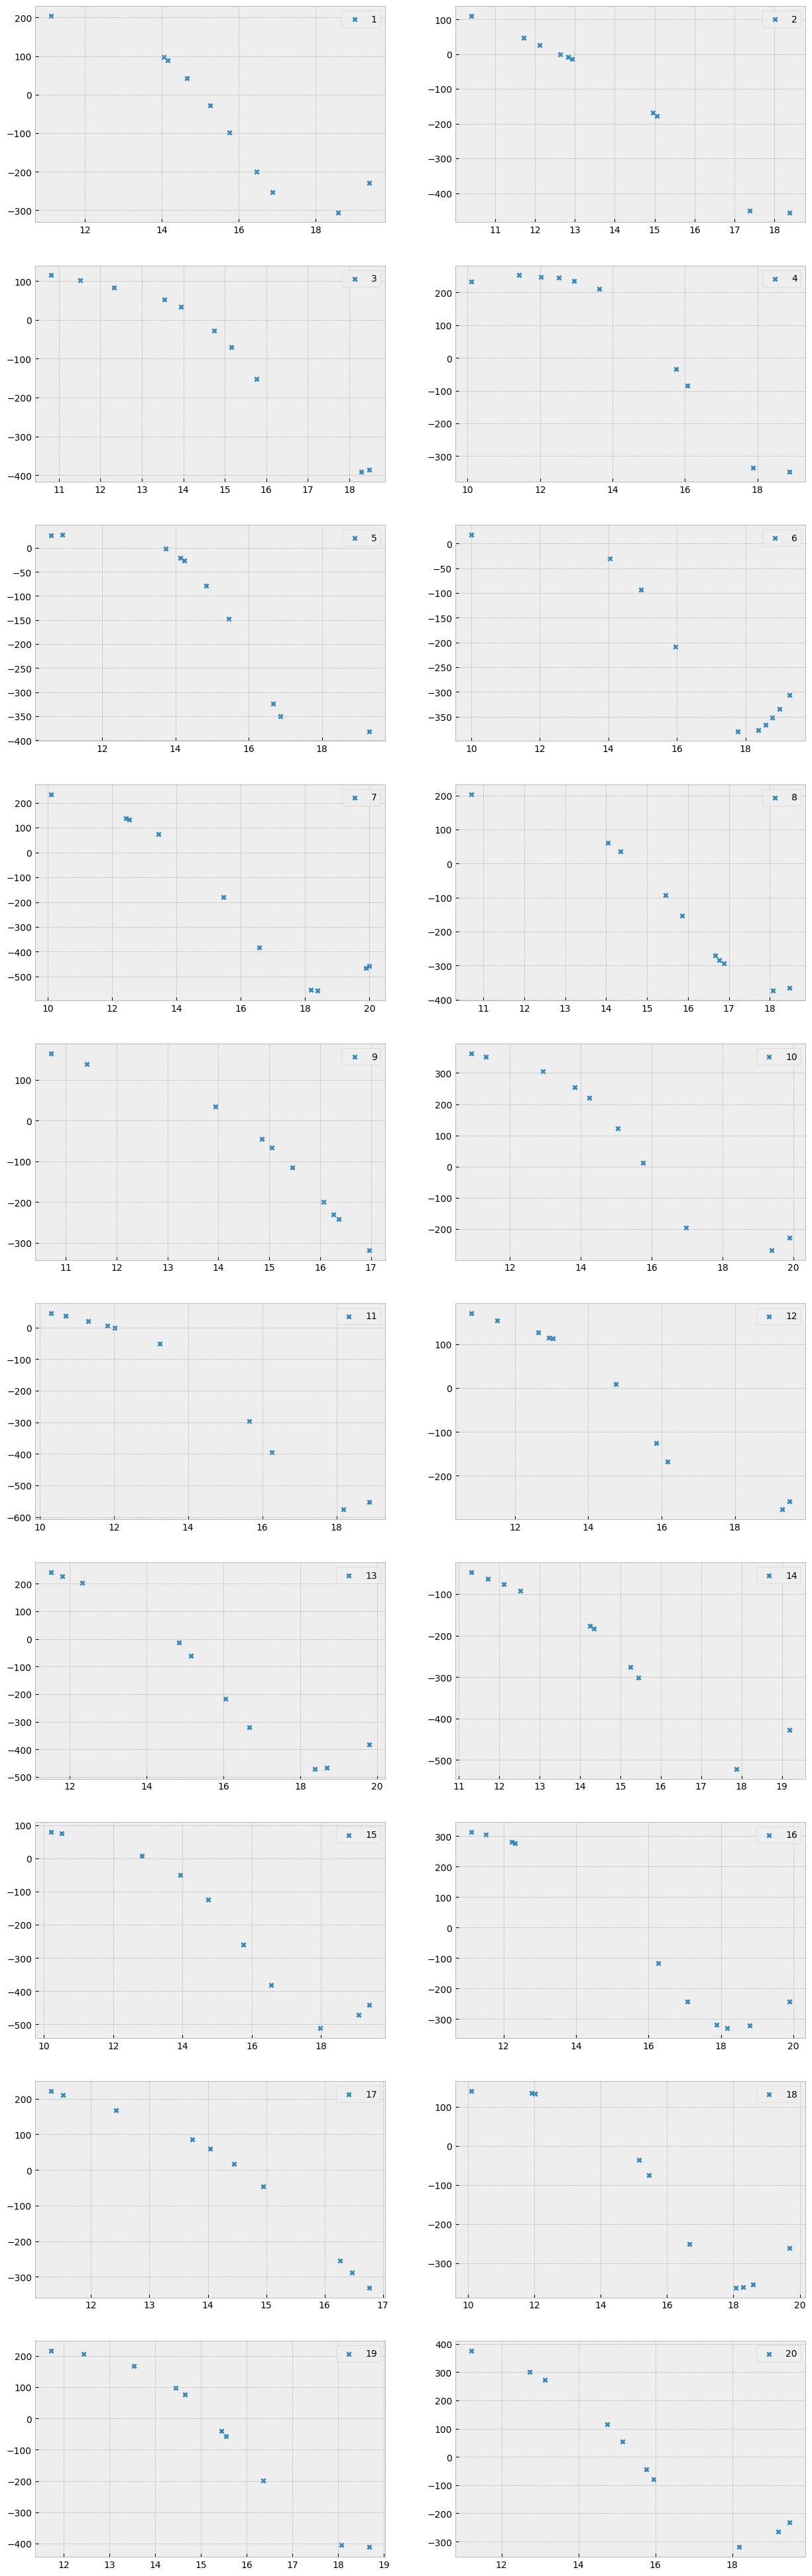

In [9]:
plt.figure(figsize=(15, int(np.ceil(M/2)) * 5))
for i in range(1, M + 1):
    plt.subplot(int(np.ceil(M/2)), 2, i)
    plt.scatter(T[i-1], Y[i - 1], label=f"{i}", s=20, marker='x')
    plt.legend()
plt.show()

### Model

#### Training

In [10]:
model = MAGMA(
    T=T,
    Y=Y,
    common_T=common_T,
    m0=m0,
    m0_function=m0_function,
    theta0=np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))]),
    Theta=np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))]),
    Sigma=np.random.uniform(0, 1),
    common_hp_flag=True,
    common_grid_flag=False,
    save_history_flag=True,
    scipy_optimize_display=True,
    kernel_k=ExponentiatedQuadraticKernel,
    kernel_c=ExponentiatedQuadraticKernel,
)

In [11]:
model.Y_normalized.shape

(20, 100)

In [12]:
model.T[0]

array([11.11111111, 14.04040404, 14.14141414, 14.64646465, 15.25252525,
       15.75757576, 16.46464646, 16.86868687, 18.58585859, 19.39393939])

In [13]:
model.common_T

array([10.        , 10.1010101 , 10.2020202 , 10.3030303 , 10.4040404 ,
       10.50505051, 10.60606061, 10.70707071, 10.80808081, 10.90909091,
       11.01010101, 11.11111111, 11.21212121, 11.31313131, 11.41414141,
       11.51515152, 11.61616162, 11.71717172, 11.81818182, 11.91919192,
       12.02020202, 12.12121212, 12.22222222, 12.32323232, 12.42424242,
       12.52525253, 12.62626263, 12.72727273, 12.82828283, 12.92929293,
       13.03030303, 13.13131313, 13.23232323, 13.33333333, 13.43434343,
       13.53535354, 13.63636364, 13.73737374, 13.83838384, 13.93939394,
       14.04040404, 14.14141414, 14.24242424, 14.34343434, 14.44444444,
       14.54545455, 14.64646465, 14.74747475, 14.84848485, 14.94949495,
       15.05050505, 15.15151515, 15.25252525, 15.35353535, 15.45454545,
       15.55555556, 15.65656566, 15.75757576, 15.85858586, 15.95959596,
       16.06060606, 16.16161616, 16.26262626, 16.36363636, 16.46464646,
       16.56565657, 16.66666667, 16.76767677, 16.86868687, 16.96

In [14]:
model.T_masks[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [15]:
model.Y[0]

array([ 204.19059481,   97.30736884,   89.26925563,   42.88840567,
        -27.38814544,  -97.52841573, -200.31909305, -252.22448491,
       -305.30371048, -229.52706851])

In [16]:
model.Y_normalized[0]

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,  204.19059481,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         97.30736884,   89.26925563,    0.        ,    0.        ,
          0.        ,    0.        ,   42.88840567,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
        -27.38814544,    0.        ,    0.        ,    0.        ,
          0.        ,  -97.52841573,    0.        ,    0.     

In [17]:
model.fit(max_iterations=1, eps=1e-2)

MAGMA Training:   0%|          | 0/1 [00:00<?, ?it/s]

theta0
Theta & Sigma


MAGMA Training: 100%|██████████| 1/1 [00:06<00:00,  6.99s/it]


In [18]:
model.scipy_optimize_display = False
model.fit(max_iterations=49, eps=1e-2)

MAGMA Training:   2%|▏         | 1/49 [00:14<11:48, 14.77s/it]


In [19]:
history = model.history
len(history)

4

In [20]:
LL_theta0 = []
LL_Theta_Sigma = []

for epoch_history in history[1:]:
    LL_theta0.append(epoch_history["LL_theta0"])
    LL_Theta_Sigma.append(epoch_history["LL_Theta_Sigma"])

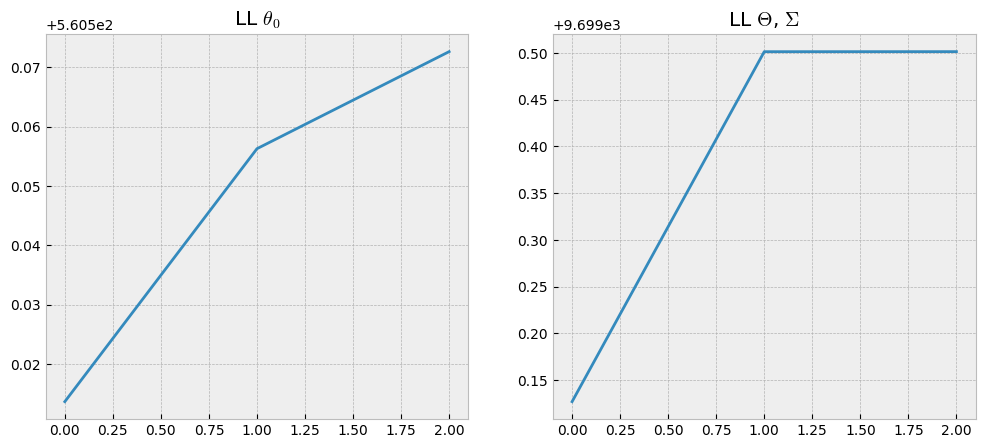

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(LL_theta0)
plt.title("LL $\\theta_0$")
plt.subplot(1, 2, 2)
plt.plot(LL_Theta_Sigma)
plt.title("LL $\Theta$, $\Sigma$")
plt.show()

In [22]:
Sigma_estim = []
for epoch_history in history:
    Sigma_estim.append(epoch_history["Sigma"]**2)

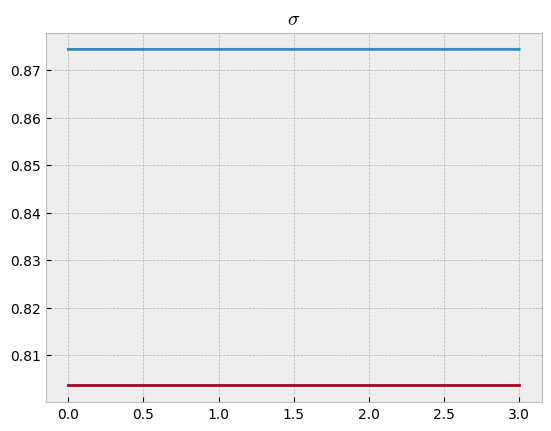

In [23]:
plt.plot(Sigma_estim,label="$\sigma$ predict")
plt.plot(Sigma*np.ones(len(Sigma_estim)),label="true $\sigma$")
plt.title("$\sigma$")
plt.show()

In [24]:
m0_estim_norms = []
for epoch_history in history[1:]:
    m0_estim_norms.append(np.linalg.norm(epoch_history["m0"]))

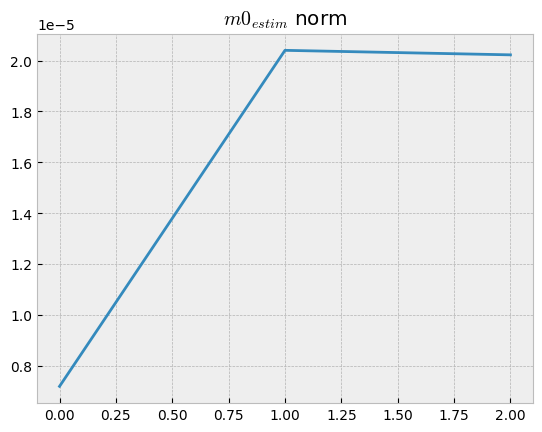

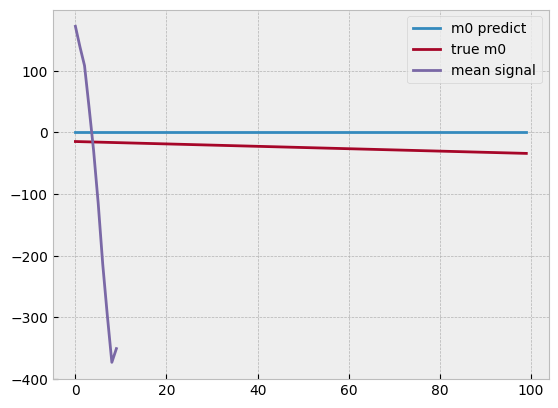

In [25]:
plt.plot(m0_estim_norms)
plt.title("$m0_{estim}$ norm")
plt.show()
plt.plot(history[-1]["m0"],label="m0 predict")
plt.plot(m0, label="true m0")
plt.plot(Y.mean(axis=0),label = "mean signal")
plt.legend()
plt.show()

In [26]:
theta0_predict = []
for epoch_history in history:
    theta0_predict.append(epoch_history["theta0"])
theta0_predict = np.array(theta0_predict)
print(model.theta0)

[164.04615177 137.11998227]


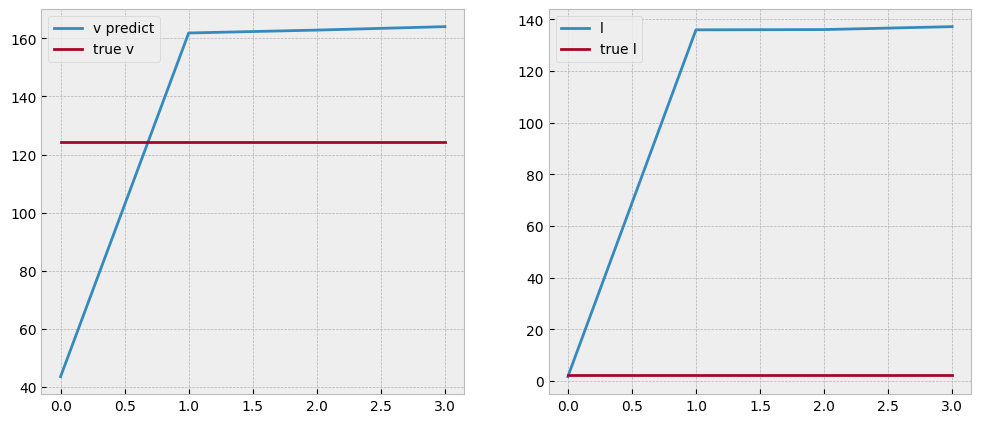

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(theta0_predict[:, 0], label="v predict")
plt.plot(theta0[0]*np.ones(len(theta0_predict[:, 0])), label="true v")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(theta0_predict[:, 1], label="l")
plt.plot(theta0[1]*np.ones(len(theta0_predict[:, 0])), label="true l")
plt.legend()
plt.show()

In [28]:
Theta_predict = []
for epoch_history in history:
    Theta_predict.append(epoch_history["Theta"])
Theta_predict = np.array(Theta_predict)
print(model.Theta)

[124.44285458   1.45335013]


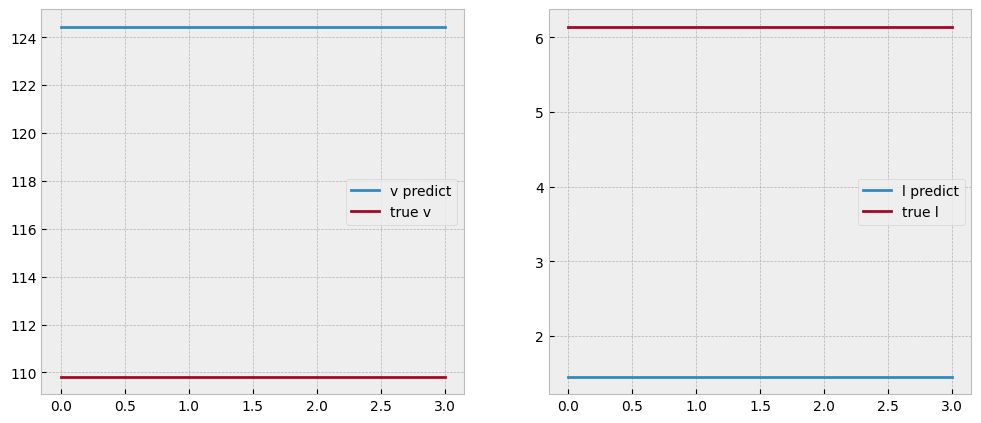

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Theta_predict[:, 0], label="v predict")
plt.plot(Theta[0]*np.ones(len(Theta_predict[:, 0])), label="true v")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Theta_predict[:, 1], label="l predict")
plt.plot(Theta[1]*np.ones(len(Theta_predict[:, 0])), label="true l")
plt.legend()
plt.show()

#### Prediction

##### Type II

In [30]:
tObs = 0
T_p_obs = np.linspace(tObs, t0-1e-3, 2*N)
m_p_obs = m0_function(T_p_obs)
Cov_p_obs = ExponentiatedQuadraticKernel.compute_all(Theta, T_p_obs) + Sigma * np.identity(2 * N)
Y_p_obs = np.random.multivariate_normal(m_p_obs, Cov_p_obs)
T_obs = T_p_obs[:N]
T_p = T_p_obs[N:]
Y_obs = Y_p_obs[:N]
Y_p = Y_p_obs[N:]
m_P = m_p_obs[N:]

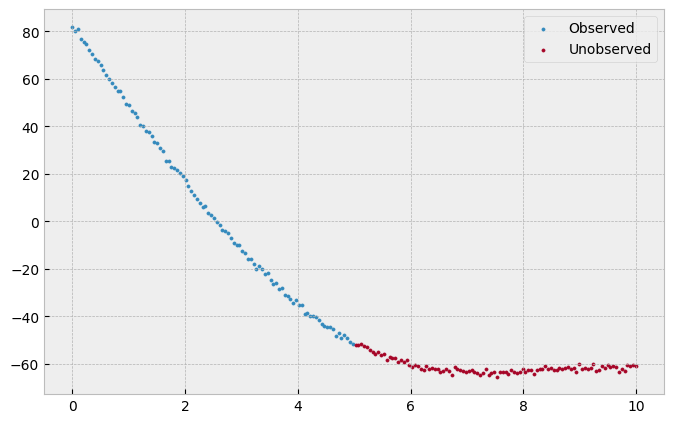

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter(T_obs, Y_obs, label="Observed", s=5)
plt.scatter(T_p, Y_p, label="Unobserved", s=5)
plt.legend()
plt.show()

In [32]:
m_P_predict, Cov_P_predict = model.predict(T_p, T_p, Y_p)

In [33]:
((m_P_predict - m_P) ** 2).sum()/(N * M)

130.02602482464138

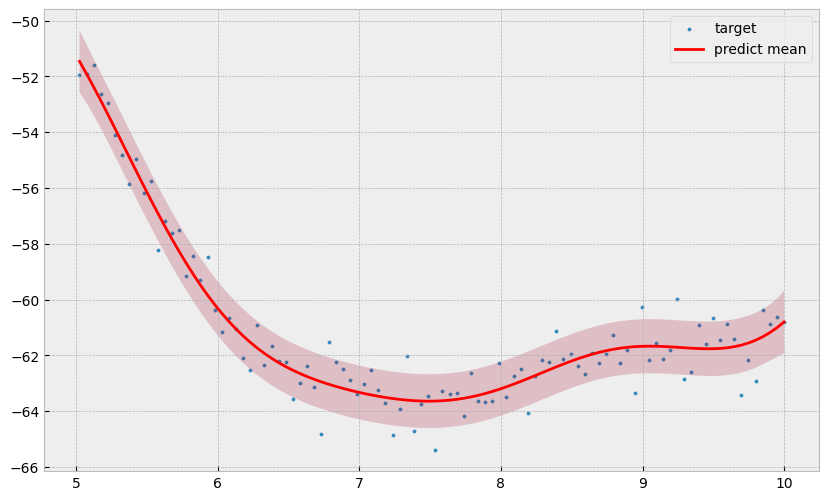

In [34]:
std_dev = np.sqrt(np.diag(Cov_P_predict))
plt.figure(figsize=(10, 6))
plt.scatter(T_p, Y_p, label='target', s=5)
plt.plot(T_p, m_P_predict, label='predict mean', color='red')
plt.fill_between(T_p, m_P_predict - std_dev, m_P_predict + std_dev, alpha=0.2)
plt.legend()
plt.show()

In [35]:
m_P_predict, Cov_P_predict = model.predict(T_p, T_obs, Y_obs)

In [36]:
((m_P_predict - m_P) ** 2).sum()/(N * M)

96.34839916525483

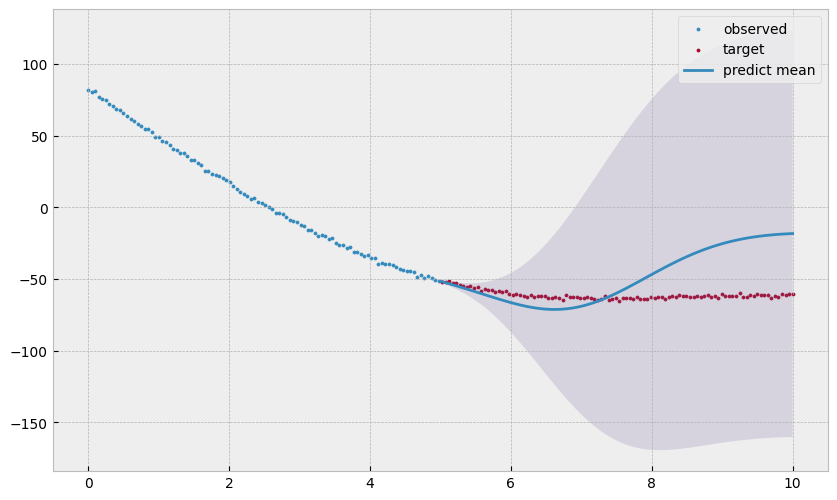

In [37]:
std_dev = np.sqrt(np.diag(Cov_P_predict))
plt.figure(figsize=(10, 6))
plt.scatter(T_obs, Y_obs, label="observed", s=5)
plt.scatter(T_p, Y_p, label='target', s=5)
plt.plot(T_p, m_P_predict, label='predict mean')
plt.fill_between(T_p, m_P_predict - std_dev, m_P_predict + std_dev, alpha=0.2)
plt.legend()
plt.show()

##### Type I

In [38]:
T_p_obs = np.concatenate([common_T, np.linspace(tN+1e-3, tN + 10, N)])
m_p_obs = m0_function(T_p_obs)
Cov_p_obs = ExponentiatedQuadraticKernel.compute_all(Theta, T_p_obs) + Sigma * np.identity(2 * N)
Y_p_obs = np.random.multivariate_normal(m_p_obs, Cov_p_obs)
T_obs = T_p_obs[:N]
T_p = T_p_obs[N:]
Y_obs = Y_p_obs[:N]
Y_p = Y_p_obs[N:]
m_P = m_p_obs[N:]

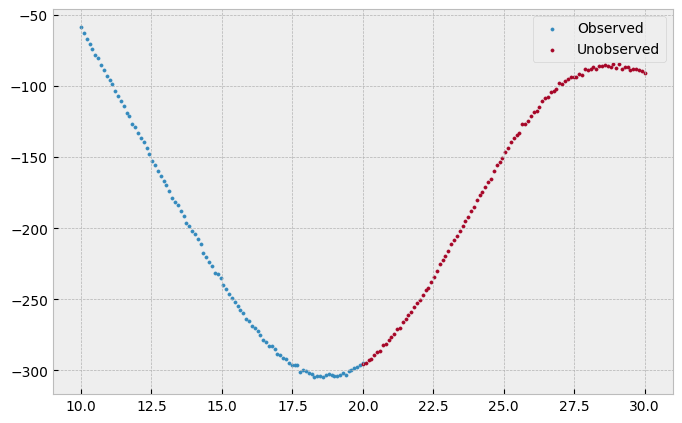

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(common_T, Y_obs, label="Observed", s=5)
plt.scatter(T_p, Y_p, label="Unobserved", s=5)
plt.legend()
plt.show()

In [40]:
m_P_predict, Cov_P_predict = model.predict(T_p, common_T, Y_obs)

In [41]:
((m_P_predict - m_P) ** 2).sum()/(N * M)

1025.3273598806222

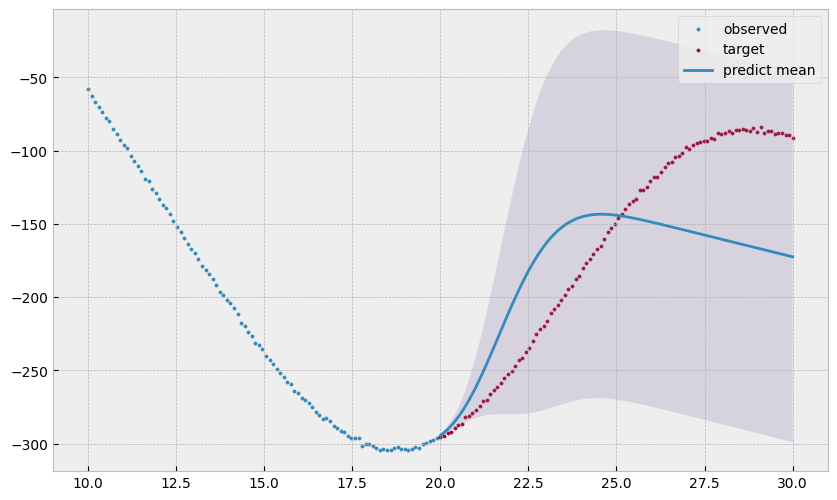

In [42]:
std_dev = np.sqrt(np.diag(Cov_P_predict))
plt.figure(figsize=(10, 6))
plt.scatter(T_obs, Y_obs, label="observed", s=5)
plt.scatter(T_p, Y_p, label='target', s=5)
plt.plot(T_p, m_P_predict, label='predict mean')
plt.fill_between(T_p, m_P_predict - std_dev, m_P_predict + std_dev, alpha=0.2)
plt.legend()
plt.show()